# MUDBENCS CTD Data Visualization

This notebook allows the visualization of CTD data from Seabird .cnv files that are acquired by the Walton Smith CTD data system. 

In [1]:
from seabird.cnv import fCNV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB


(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


In [2]:
dat_nc = fCNV('WS23061_Kelble_Stn.009.5.cnv')


In [3]:
print('The profile coordinates are latitude: %.4f, and longitude: %.4f' % (dat_nc.attributes['LATITUDE'], dat_nc.attributes['LONGITUDE']))
print('Data types available are: ', dat_nc.keys())


The profile coordinates are latitude: 24.7152, and longitude: -80.6848
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']


('Building out the variables from variable. Adding:', ['TEMP'])
('Building out the variables from variable. Adding:', ['TEMP', 'density'])
('v[z].title is ', 'Temp')
('Labeling y-axis with', 0, 'TEMP')
('v[z].title is ', 'Density')


(        DEPTH      CNDC    density     flSP  wetCDOM  flECO-AFL  sbeox0Mg/L  \
 0       3.147  5.473955  1024.1113  0.13919  11.8006     0.0521      5.0532   
 1       3.114  5.473947  1024.0960  0.13797  11.9300     0.0521      5.0522   
 2       3.056  5.474077  1024.0792  0.13797  11.9300     0.0521      5.0551   
 3       3.023  5.474294  1024.0599  0.13919  11.9300     0.0521      5.0538   
 4       2.990  5.474657  1024.0459  0.13919  62.2768     0.0521      5.0612   
 ...       ...       ...        ...      ...      ...        ...         ...   
 6957  131.117  4.342333  1027.3574  0.13187   1.3818    -0.0395      4.1981   
 6958  131.117  4.342300  1027.3574  0.13065  -0.2360    -0.0395      4.1978   
 6959  131.117  4.342353  1027.3577  0.13065  -0.3007    -0.0395      4.2033   
 6960  131.051  4.342280  1027.3569  0.13065  -0.1713    -0.0395      4.1986   
 6961  130.993  4.342280  1027.3567  0.13065  -0.1066    -0.0395      4.2046   
 
       sbeox0PS        par     PSAL   

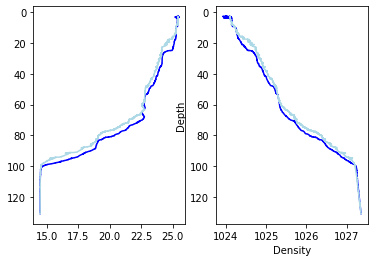

In [4]:
MB.DEBUG = True
MB.plot_profile(dat_nc, ['TEMP', 'density'], direction='both')

## Read Along Track Data
Along with CTD data, the WS23-139 cruise had along track data. Here we read those data into this workbook and plot some of the data. 

In [5]:
#Read in the along track data. Set the variable MB.DEBUG to True to print the colunm names. 
MB.DEBUG = True
AT_data_df = MB.read_along_track_data('Both')
print(AT_data_df.shape)

(Index(['Date_Time', 'GPS1 Lat', 'Dir', 'Lon', 'Dir.1', 'SOG Knots',
       'COG Deg. True', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'GPS2 Lat', 'Dir.2',
       'Lon.1', 'Dir.3', 'SOG Knots.1', 'COG Deg. True.1', 'Lat Dec. Deg..1',
       'Lon Dec. Deg..1', 'Gyro', 'Water Speed F/A Spd. Knots',
       'P/S Spd. Knots', 'PIR w/m^2', 'PSP w/m^2', 'TUV w/m^2',
       'Rain Gauge Cond. Code', 'Inst. Precip. mm/hr', 'Accum. Precip. mm',
       'Depth Feet', 'Meters', 'Fathoms', 'Fluorometer Reading Volts', 'Gain',
       'DisOrgMat Reading Volts', 'Gain.1', 'SBTemp Degrees C', 'POSMV Lat',
       'Dir.4', 'Lon.2', 'Dir.5', 'SOG Knots.2', 'COG Degrees T',
       'Lat Dec. Deg..2', 'Lon Dec. Deg..2', 'POSMV Heading Degrees T',
       'RM Young Barometer mb', 'Stbd RM Young Winds Rel. Wind Spd. Knots',
       'Rel. Wind Dir. Degrees', 'True Wind Spd. Knots',
       'True Wind Dir. Degrees', 'Port RM Young Met Air Temp. Degrees C',
       'Rel. Humid. %', 'Baro. Press. mb', 'MicroTSG1 Temperature Deg

## Map Along-track Data
The following cell allows you to plot any of the variables represented by the columns in the DataFrame resulting from read_along_track_data. Default variable is `' Salinity PSU'` - if you enter a non-existent variable or misspell the variable, it will return to Salinity. Additionally, the map axes are returned so you can add points or other information (vector fields, annotations, images, etc.). Below, it is shown how to add a point that was recorded in the ship logs as a frontal boundary seen on radar. This point coincides nicely with the very high Chlorophyll-a data which are plotted. 

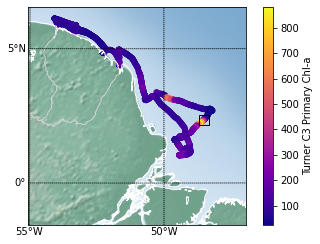

In [6]:
m = MB.MUDBENCS_map(AT_data_df, 'Turner C3 Primary Chl-a')
#Add position of recorded front, for demonstration how to access the map axes m:
front_lat = 2+20.3687/60
front_lon = -(48+31.416/60)
m.plot(front_lon, front_lat, latlon=True, marker='s', markersize=10, color='None', markeredgecolor='k')

## Calculate the average position and approximate motion on-station

Using the read_along_track_data function, you can get on-station data by inserting a manual begin_end list of strings. Here, the calculation of the average lat and lon for Station 02 (Seawater Endmember) is shown. More complex calculations can be carried out for each station, but this simple one uses the pandas functions operable on dataframes. The values in square brackets and single quotes are the names of columns of data, and they must match exactly entries from the list of column names. You can see the column names by changing MB.DEBUG to True. 

In [7]:
MB.DEBUG = False
Station02_data_df = MB.read_along_track_data(['7 Jun 2023 10:30', '7 Jun 2023 18:30'])
mean_lat = Station02_data_df['Lat Dec. Deg.'].mean()
mean_lon = Station02_data_df['Lon Dec. Deg.'].mean()
std_lat = Station02_data_df['Lat Dec. Deg.'].std()
std_lon = Station02_data_df['Lon Dec. Deg.'].std()

print('Mean Lat (std) = %.4f (%.3f), Mean Lon (std) = %.4f (%.3f) ' % (mean_lat, std_lat, mean_lon, std_lon))

Mean Lat (std) = 2.6333 (0.095), Mean Lon (std) = -48.3016 (0.069) 
